In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-interp-vander)

We create two column vectors for data about the population of China. The first has the years of census data and the other has the population, in millions of people.

In [2]:
year = [1982; 2000; 2010; 2015]; 
pop = [1008.18; 1262.64; 1337.82; 1374.62];

It's convenient to measure time in years since 1980.

In [3]:
t = year - 1980;
y = pop;

```{index} ! MATLAB; vander
```

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix:

In [4]:
V = vander(t)

V = 4×4 double
           8           4           2           1
        8000         400          20           1
       27000         900          30           1
       42875        1225          35           1

:::{index} ! MATLAB; \\
:::

To solve for the vector of polynomial coefficients, we use a backslash to solve the linear system:
```{tip}
:class: dropdown
A **backslash** `\` is used to solve a linear system of equations.
```

In [5]:
c = V \ y

c = 4×1 double
    0.0068
   -0.5923
   24.1278
  962.2388

The algorithms used by the backslash operator are the main topic of this chapter. As a check on the solution, we can compute the *residual*.

In [6]:
y - V * c

ans = 4×1 double
1.0e-12 *

    0.1137
         0
         0
         0

Using floating-point arithmetic, it is not realistic to expect exact equality of quantities; a relative difference comparable to $\macheps$ is all we can look for.

By our definitions, the elements of `c` are coefficients in descending-degree order for the interpolating polynomial. We can use the polynomial to estimate the population of China in 2005:

In [7]:
p = @(t) polyval(c, t - 1980);  % include the 1980 time shift
p(2005)

ans = 1.3022e+03

The official population value for 2005 was 1303.72, so our result is rather good. 

:::{index} ! MATLAB; scatter
:::

We can visualize the interpolation process. First, we plot the data as points.
```{tip}
:class: dropdown
The `scatter` function creates a scatter plot of points; you can specify a line connecting the points as well.
```

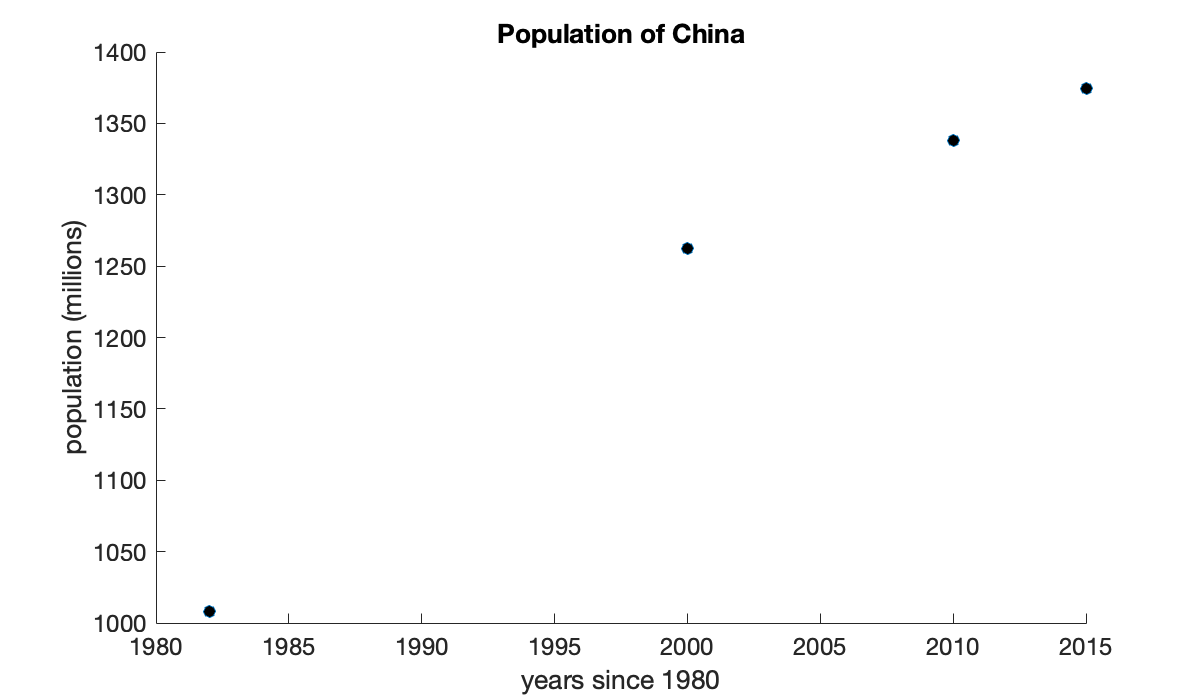

In [8]:
scatter(year, y)
xlabel("years since 1980")
ylabel("population (millions)")
title(("Population of China"));

:::{index} ! MATLAB; linspace
:::

We want to superimpose a plot of the polynomial. We do that by evaluating it at a vector of points in the interval.
```{tip}
:class: dropdown
The `linspace` function constructs evenly spaced values given the endpoints and the number of values.
```

In [9]:
tt = linspace(1980, 2015, 500);    % 500 times in the interval [1980, 2015]
yy = p(tt);                        % evaluate p at all the vector elements
yy(1:4)

ans = 1×4 double
  962.2388  963.9282  965.6118  967.2896

```{index} ! MATLAB; hold on, ! MATLAB; plot
```

Now we use `plot!` to add to the current plot, rather than replacing it.
```{tip}
:class: dropdown
Use `hold on` to add to an existing plot rather than replacing it.
The `plot` function plots lines connecting the given $x$ and $y$ values; you can also specify markers at the points.
```

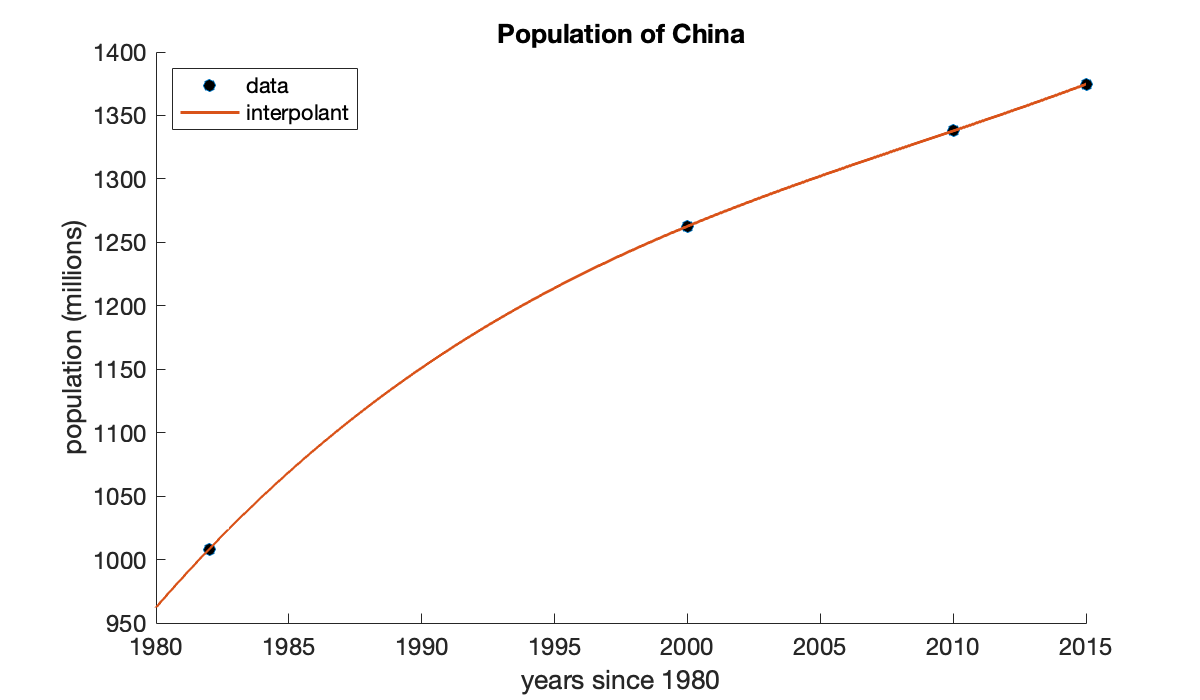

In [10]:
hold on 
plot(tt, yy)
legend("data", "interpolant", "location", "northwest");